In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numexpr as ne
%run propagators_1d.py

In [2]:
energy = 1000
wavel = (1240/energy)*10**(-9)
pi = np.pi
z = 30e-3
N = 100
L_in  = 5e-6
L_out = 600e-6

in_domain_exact  = np.linspace(-L_in/2,L_in/2,N)
out_domain_exact = np.linspace(-L_out/2,L_out/2,N)

in_wave = np.zeros(N)
in_wave[int(N/2)-int(N/8):int(N/2)+int(N/8)] = 1
out_wave_exact = np.zeros((N),dtype='complex128')

In [3]:
sampling = in_domain_exact[1] - in_domain_exact[0]
critical = (wavel*z/L_in)
print(sampling>critical)

False


In [4]:
exact_prop(in_wave,out_wave_exact,L_in,L_out,wavel,z)

In [5]:
out_,L_ = propFF(in_wave,L_in/N,L_in,wavel,z)
out_domain_ = np.linspace(-L_/2,L_/2,N)

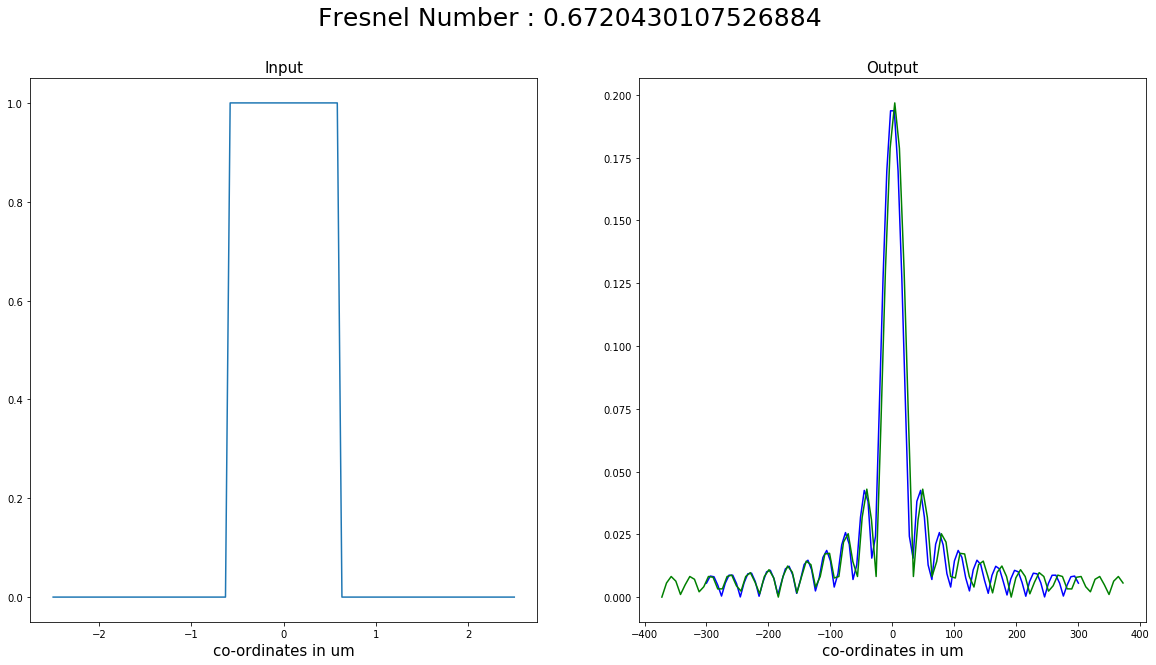

In [6]:
f, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(in_domain_exact*1e6,np.abs(in_wave))
ax1.set_xlabel('co-ordinates in um',fontsize = 15)
ax1.set_title('Input', fontsize = 15)
ax2.plot(out_domain_exact*1e6, np.abs(out_wave_exact),'b')
ax2.plot(out_domain_*1e6, np.abs(out_),'g')
ax2.set_xlabel('co-ordinates in um',fontsize = 15)
ax2.set_title('Output', fontsize = 15)
f.set_size_inches(20, 10, forward=True)
f.suptitle('Fresnel Number : '+str((L_in**2)/(wavel*z)),fontsize = 25)
plt.show()

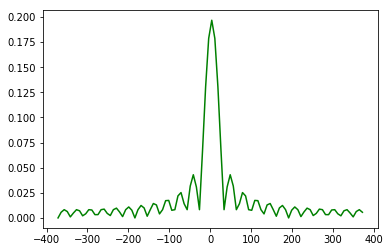

In [7]:
plt.plot(out_domain_*1e6, np.abs(out_),'g')
plt.show()

In [8]:
1.2/0.07

17.142857142857142